In [1]:
from module_imports import *
from download_data import *
from import_data import *
from larochelle_nn.py import *

%matplotlib inline

stock_df, prediction_df = pd.DataFrame(), pd.DataFrame()
pred_tickers = []
source = "G"
binarize = True
gt = 0
lt = 10.0
vol = 0
if source == "Q":
    stock_df, prediction_df, pred_tickers = get_quandl_data(binarize=True, gt=gt, lt=lt, vol=vol)
elif source == "G":
    stock_df, prediction_df = get_goog_data(binarize=True, gt=gt, lt=lt, vol=vol)
    
Y = stock_df['label'].values
Y = Y.reshape(Y.shape[0], 1)

X_df = stock_df.drop('label', axis=1)
X = X_df.values

print X.shape, Y.shape
X_df.tail()

(1148, 85) (1148, 1)


,10.0-CLOSE,10.0-HIGH,10.0-LOW,10.0-OPEN,10.0-VOLUME,10.0-op_cl%,10.0-lo_hi%,10.3-CLOSE,10.3-HIGH,10.3-LOW,...,15.0-op_cl%,15.0-lo_hi%,15.3-CLOSE,15.3-HIGH,15.3-LOW,15.3-OPEN,15.3-VOLUME,15.3-op_cl%,15.3-lo_hi%,week_day
0,7.3900,7.470,7.0304,7.0304,37786,0.051149,0.062528,7.300,7.3900,7.2900,...,0.008174,0.016076,7.38,7.400,7.3400,7.40,7953,-0.002703,0.008174,1
0,7.0900,7.600,7.0505,7.6000,9525,-0.067105,0.077938,7.018,7.1100,6.9501,...,-0.002869,0.005755,6.91,6.950,6.9000,6.94,7828,-0.004323,0.007246,2
0,6.7900,6.960,6.7800,6.9600,10002,-0.024425,0.026549,6.681,6.8300,6.6000,...,-0.006039,0.008156,6.62,6.690,6.5600,6.58,13700,0.006079,0.019817,3
0,6.6500,6.680,6.4600,6.6800,15827,-0.004491,0.034056,6.730,6.9396,6.7001,...,-0.030928,0.039802,6.55,6.576,6.5500,6.57,5300,-0.003044,0.003969,4
0,5.8884,6.312,5.6300,6.3120,73120,-0.067110,0.121137,6.300,6.3000,5.8600,...,0.009724,0.019640,6.26,6.275,6.2186,6.23,11000,0.004815,0.009070,0


In [2]:
'''
# randomly balance labeled data
indices_Y_is_0 = np.where(Y == 0)[0]
print indices_Y_is_0.shape[0]
indices_Y_is_1 = np.where(Y == 1)[0]
print indices_Y_is_1.shape[0]

subset_indices_Y_is_0 = np.random.choice(indices_Y_is_0, indices_Y_is_1.shape[0])
X_is_0 = X[subset_indices_Y_is_0]
Y_is_0 = Y[subset_indices_Y_is_0]
X_is_1 = X[indices_Y_is_1]
Y_is_1 = Y[indices_Y_is_1]

X = np.concatenate((X_is_0,X_is_1))
Y = np.concatenate((Y_is_0,Y_is_1))
'''

1087
61


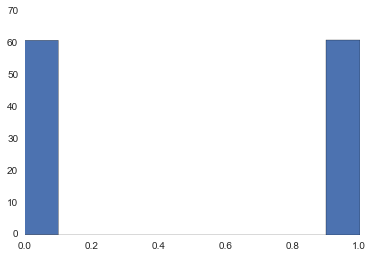

In [3]:
plt.hist(Y)
plt.show()

In [4]:
vectorize_label = True
if vectorize_label == True:
    new_y = []
    positives = []
    for i in xrange(Y.shape[0]):
        if Y[i] == 0:
            new_y.append(np.array([[1],[0]]))
        elif Y[i] == 1:
            new_y.append(np.array([[0],[1]]))
    Y = new_y

In [5]:
X_train, X_vt, y_train, y_vt = train_test_split(X, Y, test_size=0.30, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_vt, y_vt, test_size=0.50, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [7]:
#for x,y in zip(X_train, y_train):
#    print x.reshape(x.shape[0],1)
#    print y.reshape(y.shape[0],1)
#    break

---

In [ ]:
#Q,True,0,50.0,0,10,2
#h1: 2 h2: 2 epochs: 20 Lambda: 1.0 Reg: L2 alpha: 1.0   <--- alpha was the culprit
# np.isnan(W1[0])[0] == True) == True
# EPOCH 0

In [ ]:
hs = [1, 2, 5, 10, 15, 50, 75, 100]

epochs = 500#20 
Lambdas = [0, 0.0001, 0.001, 0.01, 0.1, 1.0]
Regs = ['L2', 'L1']
alphas = [0.0001, 0.001, 0.01, 0.1]

# GRID SEARCH
for h in hs:
    for Lambda in Lambdas:
        for Reg in Regs:
            for alpha in alphas:
                NN_SGD(X_train, y_train, X_validation, y_validation, h, h, epochs, Lambda, Reg, alpha, plot=False)

---